In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df=pd.read_csv("Datasets/customer.csv")

In [11]:
df.shape

(50, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        50 non-null     int64 
 1   gender     50 non-null     object
 2   review     50 non-null     object
 3   education  50 non-null     object
 4   purchased  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [4]:
df.sample(5)

,age,gender,review,education,purchased
15,75,Male,Poor,UG,No
38,45,Female,Good,School,No
48,39,Female,Good,UG,Yes
46,64,Female,Poor,PG,No
14,15,Male,Poor,PG,Yes


<AxesSubplot:ylabel='review'>

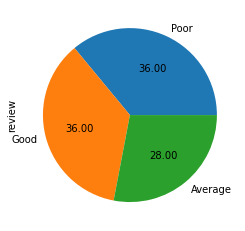

In [10]:
df['review'].value_counts().plot(kind='pie', autopct="%.2f")

In [12]:
"""Here in data, Gender,review,Education everything is categorical and purchased(target)is also categorical. So. here we use label encounting
 We have to seperate Gender and apply ordinal encoder and seperate review then do and education the apply ordinal encoder then after doing all again we have to combine"""


'Here in data, Gender,review,Education everything is categorical and purchased(target)is also categorical. So. here we use label encounting\n We have to seperate Gender and apply ordinal encoder and seperate review then do and education the apply ordinal encoder then after doing all again we have to combine'

In [13]:
df= df.iloc[:,2:]

In [14]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.drop('purchased',axis=1), df['purchased'], test_size=0.2)

In [20]:
X_train.shape, X_test.shape

((40, 2), (10, 2))

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
oe=OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [25]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [26]:
X_train=oe.transform(X_train)

In [39]:
X_train

array([[1., 1.],
       [0., 2.],
       [0., 2.],
       [1., 1.],
       [0., 2.],
       [0., 1.],
       [1., 2.],
       [2., 2.],
       [1., 1.],
       [2., 2.],
       [1., 0.],
       [0., 0.],
       [2., 0.],
       [0., 2.],
       [2., 1.],
       [2., 0.],
       [0., 0.],
       [0., 2.],
       [2., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [2., 1.],
       [0., 1.],
       [0., 2.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [2., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [2., 1.],
       [2., 0.],
       [1., 2.],
       [2., 2.],
       [2., 2.],
       [1., 2.],
       [2., 0.],
       [2., 1.]])

In [29]:
X_test= oe.transform(X_test)

In [30]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
le.fit(y_train)

LabelEncoder()

In [34]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [35]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [37]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])